In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
y_train = y_train.reshape(-1, 1)

In [4]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [5]:
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0 255
0 255


In [6]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [7]:
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0.0 1.0
0.0 1.0


In [8]:
print(f"x_train shape: {x_train.shape}")

x_train shape: (50000, 32, 32, 3)


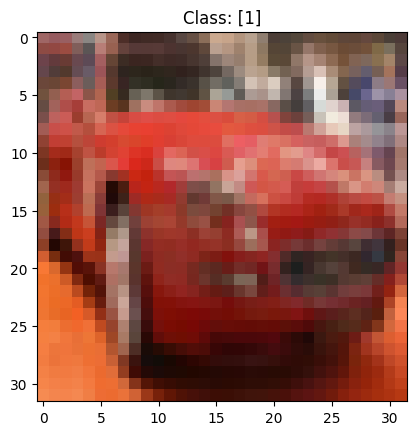

In [9]:
plt.imshow(x_train[5])
plt.title(f'Class: {y_train[5]}')  # แสดงคลาสของรูป
plt.show()

In [18]:
import tensorflow as tf
from keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping


model = models.Sequential()
model.add(layers.InputLayer(shape=(32, 32,3)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.BatchNormalization())
model.add(layers.Flatten())

model.add(layers.Dropout(0.3))

model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))


model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 15, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 128)           │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 2, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,332,746 (5.08 MB)

 Trainable params: 1,332,490 (5.08 MB)

 Non-trainable params: 256 (1.00 KB)

In [20]:
model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy
              optimizer="adam",
              metrics=["accuracy"])

In [21]:
history = model.fit(x_train, y_train, epochs=150, validation_data=(x_train, y_train), callbacks=[early_stopping])

Epoch 1/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1223s 780ms/step - accuracy: 0.3403 - loss: 1.7816 - val_accuracy: 0.4791 - val_loss: 1.5566
Epoch 2/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1190s 759ms/step - accuracy: 0.5456 - loss: 1.2841 - val_accuracy: 0.5746 - val_loss: 1.1954
Epoch 3/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1264s 809ms/step - accuracy: 0.6093 - loss: 1.1118 - val_accuracy: 0.1662 - val_loss: 4.7727
Epoch 4/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1253s 802ms/step - accuracy: 0.6500 - loss: 1.0041 - val_accuracy: 0.6446 - val_loss: 1.0179
Epoch 5/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1249s 799ms/step - accuracy: 0.6829 - loss: 0.9153 - val_accuracy: 0.7028 - val_loss: 0.8507
Epoch 6/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1258s 784ms/step - accuracy: 0.6995 - loss: 0.8601 - val_accuracy: 0.7319 - val_loss: 0.7540
Epoch 7/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1273s 778ms/step - accuracy: 0.7203 - loss: 0.7995 - val_accuracy: 0.7405 - val_loss: 0.7468
Epoch 8/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1221s

In [22]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 213ms/step - accuracy: 0.7730 - loss: 0.6956


[0.7060509920120239, 0.7692000269889832]

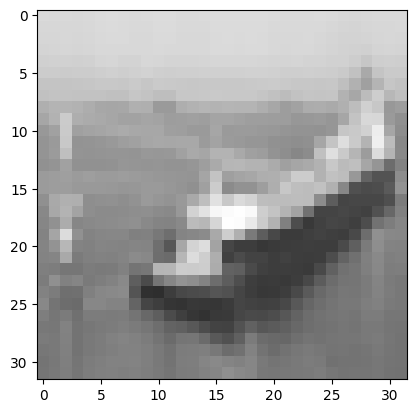

In [23]:
plt.imshow(x_test[120], cmap='gray')

In [24]:
yp = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 152ms/step


In [25]:
yp[120]

array([3.9849640e-04, 6.4588312e-05, 2.1764727e-07, 1.6072757e-08,
       4.9699418e-09, 7.4198674e-09, 7.7385801e-07, 6.5239867e-09,
       9.9953479e-01, 1.0932346e-06], dtype=float32)

In [26]:
np.argmax(yp[0])

3

In [27]:
model.save('CNN_fashion_mnist.keras')